Importing the necessaries

In [1]:
from datasets import load_dataset

c:\root\Projects\python\opjustice-lm\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the dataset from disk

In [2]:
train_dataset = load_dataset('rootblind/opjustice-dataset', split='train')
test_dataset = load_dataset('rootblind/opjustice-dataset', split='test')

Inspecting data

In [3]:
train_dataset.to_pandas().head()

,Message,OK,Insult,Violence,Sexual,Hateful,Flirt,Spam,Aggro
0,ii rupem pe bot,1,0,0,0,0,0,0,0
1,excelent jungler ( 🥵 evelynn & rengar 😳 ) 20/...,1,0,0,0,0,0,0,0
2,"Veigar ฅ^•ﻌ•^ฅ 🌺 , Andu astro feeders :p",1,0,0,0,0,0,0,0
3,inting,1,0,0,0,0,0,0,0
4,minte ca nu e smurf si trolleaza de pe contu mic,1,0,0,0,0,0,0,0


In [4]:
test_dataset.to_pandas().head()

,Message,OK,Insult,Violence,Sexual,Hateful,Flirt,Spam,Aggro
0,handicapat,0,1,0,0,0,0,0,0
1,retardat,0,1,0,0,0,0,0,0
2,cretin,0,1,0,0,0,0,0,0
3,terminatule,0,1,0,0,0,0,0,1
4,te bat,0,0,1,0,0,0,0,1


Converting the dataset to pandas for easier analysis

In [5]:
import pandas as pd

df_train = train_dataset.to_pandas()
df_test = test_dataset.to_pandas()

df_train.describe()

,OK,Insult,Violence,Sexual,Hateful,Flirt,Spam,Aggro
count,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000
mean,0.886008,0.031431,0.007387,0.040122,0.011298,0.006373,0.001014,0.054461
std,0.317824,0.174492,0.085636,0.196259,0.105697,0.079583,0.031828,0.248863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [6]:
df_test.describe()

,OK,Insult,Violence,Sexual,Hateful,Flirt,Spam,Aggro
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,0.644578,0.121988,0.117470,0.106928,0.082831,0.018072,0.016566,0.194277
std,0.479002,0.327519,0.322222,0.309254,0.275835,0.133313,0.127736,0.395941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking for null values

In [7]:
df_train.isnull().sum()

Message     0
OK          0
Insult      0
Violence    0
Sexual      0
Hateful     0
Flirt       0
Spam        0
Aggro       0
dtype: int64

Data visualization

In [8]:
import matplotlib.pyplot as plt # importing the neccessary library

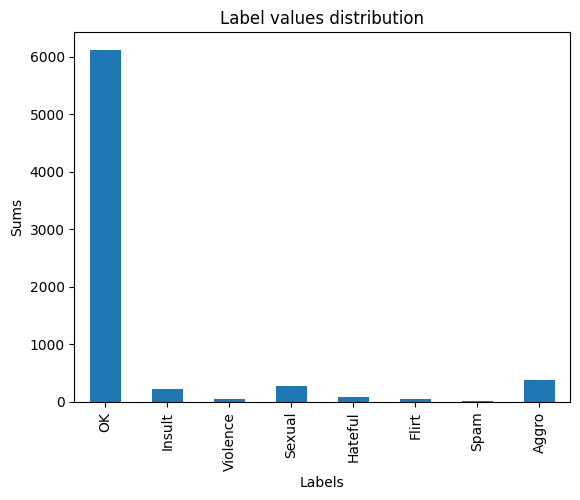

OK          6117
Insult       217
Violence      51
Sexual       277
Hateful       78
Flirt         44
Spam           7
Aggro        376
dtype: int64


In [18]:
columns = df_train.drop(columns='Message')
columns_sums = columns.sum(axis=0)
columns_sums.plot(kind='bar')

plt.title('Labels distribution in train')
plt.ylabel('Sums')
plt.xlabel('Labels')
plt.show()
print(columns_sums)

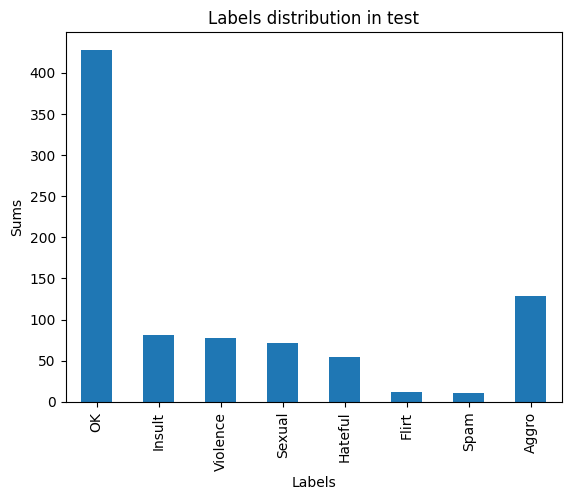

OK          428
Insult       81
Violence     78
Sexual       71
Hateful      55
Flirt        12
Spam         11
Aggro       129
dtype: int64


In [19]:
columns = df_test.drop(columns='Message')
columns_sums = columns.sum(axis=0)
columns_sums.plot(kind='bar')

plt.title('Labels distribution in test')
plt.ylabel('Sums')
plt.xlabel('Labels')
plt.show()
print(columns_sums)

Comparing the train and the test datasets sizes

[6904, 664]


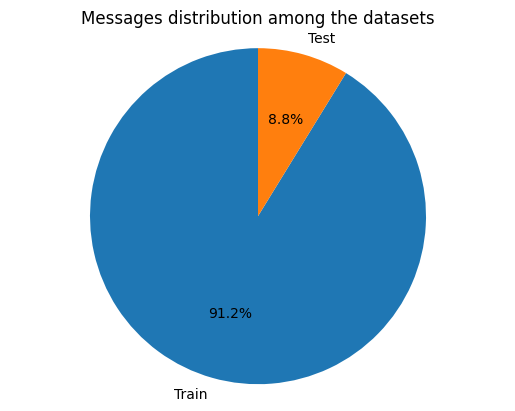

In [23]:
train_test = ['Train', 'Test']
train_test_size = [df_train['Message'].value_counts().sum(), df_test['Message'].value_counts().sum()]
plt.pie(train_test_size, labels=train_test, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Messages distribution among the datasets')
plt.show()
print(train_test_size)